Project Final Exam. 

# LORITAH BUKIRWA - J24M19/003

### PART A.
This dataset includes information and factors affecting landslides in Iran. The dataset contains over 4,000 landslide hazards in 
Iran, each of which has been characterized by a variety of factors that may contribute to landslide occurrence. These factors include 
natural factors such as slope, climate, tectonic activity, etc., and human factors such as land use, etc. These factors can have a 
significant impact on the likelihood of a landslide occurring. For example, slope is one of the most important natural factors 
affecting landslides. Note that landslides are more likely to occur on steep slopes.

> 1. Use the dataset to generate various insights on landslide occurrences in Iran.

> 2. Generate and publish your results in a python notebook on your Kaggle or Github account.

In [3]:
#suppress warnings

import warnings 
warnings.filterwarnings('ignore')

#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 



In [7]:
#import the dataset
iran = pd.read_csv("Landslide_Factors_IRAN.csv")

#view dataset
iran.head(5)


,ID,LONG,LAT,SUB_Basin,Elevation,AAP(mm),RiverDIST(m),FaultDIST(m),Landuse_Type,Slop(Percent),Slop(Degrees),GEO_UNIT,DES_GEOUNI,Climate_Type,DES_ClimateType
0,1,52.326,27.763,Mehran,617.0,137,1448.705292,40639.57890,poorrange,42.240669,22.899523,EOas-ja,"Undivided Asmari and Jahrum Formation , regard...",A-M-VW,"Warm and humid, with a humid period longer tha..."
1,2,52.333,27.772,Mehran,944.0,137,344.299484,40135.02913,mix(woodland_x),68.219116,34.301464,KEpd-gu,Keewatin Epedotic quartz diorite,A-M-VW,"Warm and humid, with a humid period longer tha..."
2,3,52.326,27.763,Mehran,617.0,137,1448.705292,40639.57890,poorrange,42.240669,22.899523,EOas-ja,"Undivided Asmari and Jahrum Formation , regard...",A-M-VW,"Warm and humid, with a humid period longer tha..."
3,4,52.333,27.694,Mehran,55.0,137,1889.828623,42189.54442,rock,12.141766,6.922833,Mlmmi,Low weathering grey marls alternating with ba...,A-M-VW,"Warm and humid, with a humid period longer tha..."
4,5,52.324,27.682,Mehran,20.0,137,874.201691,43010.08400,poorrange,2.216230,1.269598,MuPlaj,"Brown to grey , calcareous , feature - formin...",A-M-VW,"Warm and humid, with a humid period longer tha..."


In [8]:
#check for missing data. 
iran.isna().sum()

ID                 0
LONG               0
LAT                0
SUB_Basin          0
Elevation          0
AAP(mm)            0
RiverDIST(m)       0
FaultDIST(m)       0
Landuse_Type       0
Slop(Percent)      0
Slop(Degrees)      0
GEO_UNIT           0
DES_GEOUNI         0
Climate_Type       0
DES_ClimateType    0
dtype: int64

Dataset has no missing data

In [16]:
#checking the data statistics
iran.describe()

,ID,LONG,LAT,Elevation,AAP(mm),RiverDIST(m),FaultDIST(m),Slop(Percent),Slop(Degrees)
count,4295.000000,4295.000000,4295.000000,4295.000000,4295.000000,4295.000000,4295.000000,4295.000000,4295.000000
mean,2148.000000,50.991609,34.934854,1391.111692,242.166007,809.247705,5464.176909,23.083628,12.684708
std,1240.004032,3.354156,2.639496,673.859458,136.964710,974.939030,5920.570823,15.483778,7.976655
min,1.000000,44.302000,26.424000,0.000000,54.000000,0.065920,1.121601,0.000000,0.000000
25%,1074.500000,48.433000,32.997500,860.500000,158.000000,208.199375,1314.589467,11.533882,6.579355
50%,2148.000000,50.499000,36.173000,1552.000000,194.000000,526.187336,3486.626632,20.419369,11.540784
75%,3221.500000,53.190500,36.864000,1902.500000,270.000000,1116.083961,7701.447471,31.399784,17.432177
max,4295.000000,61.792000,39.293000,3583.000000,1142.000000,25656.226180,44108.087060,100.000000,45.000000


In [9]:

#checking out the general information about the dataset
iran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4295 entries, 0 to 4294
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               4295 non-null   int64  
 1   LONG             4295 non-null   float64
 2   LAT              4295 non-null   float64
 3   SUB_Basin        4295 non-null   object 
 4   Elevation        4295 non-null   float64
 5   AAP(mm)          4295 non-null   int64  
 6   RiverDIST(m)     4295 non-null   float64
 7   FaultDIST(m)     4295 non-null   float64
 8   Landuse_Type     4295 non-null   object 
 9   Slop(Percent)    4295 non-null   float64
 10  Slop(Degrees)    4295 non-null   float64
 11  GEO_UNIT         4295 non-null   object 
 12  DES_GEOUNI       4295 non-null   object 
 13  Climate_Type     4295 non-null   object 
 14  DES_ClimateType  4295 non-null   object 
dtypes: float64(7), int64(2), object(6)
memory usage: 503.4+ KB


Categorical data- SUB_Basin,Landuse_Type,GEO_UNIT,DES_GEOUNI,Climate_Type,DES_ClimateType

Continous data - LONG,LAT,Elevation,AAP(mm),RiverDIST(m),FaultDIST(m),Slop(Percent),Slop(Degrees)

In [44]:
cat_iran = ["SUB_Basin","Landuse_Type","GEO_UNIT","DES_GEOUNI","Climate_Type","DES_ClimateType"]
cont_iran = iran[["LONG","LAT","Elevation","AAP(mm)","RiverDIST(m)","FaultDIST(m)","Slop(Percent)","Slop(Degrees)"]]

In [11]:
#checking for no. of unique values in the categorical variables
for col in cat_iran:
    uni_val = iran[col].nunique()
    print(f"Number of unique values for '{col}': {uni_val}")

Number of unique values for 'SUB_Basin': 65
Number of unique values for 'Landuse_Type': 37
Number of unique values for 'GEO_UNIT': 217
Number of unique values for 'DES_GEOUNI': 204
Number of unique values for 'Climate_Type': 15
Number of unique values for 'DES_ClimateType': 5


In [12]:
#checking for unique values in the categorical variables
for col in cat_iran:
    uni_val = iran[col].unique()
    print(f"Unique values for '{col}': {uni_val}")

Unique values for 'SUB_Basin': ['Mehran' 'Mand' 'Shoor' 'Rudan' 'Iran Southern Coast' 'Jaghin'
 'Halil Rud' 'Rakshan' 'Dalaki' 'Qarabaq' 'Zohreh' 'Neyriz Lake'
 'Namakzar-e Shahdad' 'Shur Ab' 'Bampur' 'Karun' 'Zal' 'Marun' 'Kor'
 'Zayandeh Rud' 'Shadkam' 'Gamasb' 'Nahr at Tib' 'Karkheh' 'Dez'
 'Dasht-e Kavir' 'Upper Hari Rod' 'Nahrawan Canal' 'Diyala' 'Masileh'
 'Kavir-o Namak' 'Simineh Rud' 'Lesser Zab' 'Safid Rud' 'Zarineh Rud'
 'Shur' 'Qezel Owzan' 'Se Hezar' 'Chalus' 'Talar' 'Babol' 'Jajrood'
 'Haraz' 'Hableh Rud' 'Karaj' 'Qarasu' 'Neka' 'Tajan'
 'Haj Ali Gholi Salt Lake' 'Tedzhen' 'Nakhchivan Reservoir' 'Lake Orumieh'
 'Talkheh Rud' 'Karasu' 'Safid Rud Delta' 'Vilascay / Lankaran / Tangarud'
 ' ' 'Gorgan' 'Rud-e Atrak' 'Atrak Delta' 'Kara-Kum Desert' 'Sumbar'
 'Ararat' 'Aras 2' 'Lenkeran']
Unique values for 'Landuse_Type': ['poorrange' 'mix(woodland_x)' 'rock' 'mix(agri_follow)' 'mix(bareland_x)'
 'verylowforest' 'lowforest' 'woodland1' 'bareland' 'modrange'
 'mix(poorrange_x)' 'm

### Distribution of Landslide Hazards by SUB_Basin

Distribution of Landslides by Sub-Basin:
SUB_Basin
Karun            593
Qezel Owzan      447
Gorgan           364
Diyala           279
Safid Rud        184
                ... 
Marun              1
Sumbar             1
Nahr at Tib        1
Kavir-o Namak      1
Lenkeran           1
Name: count, Length: 65, dtype: int64


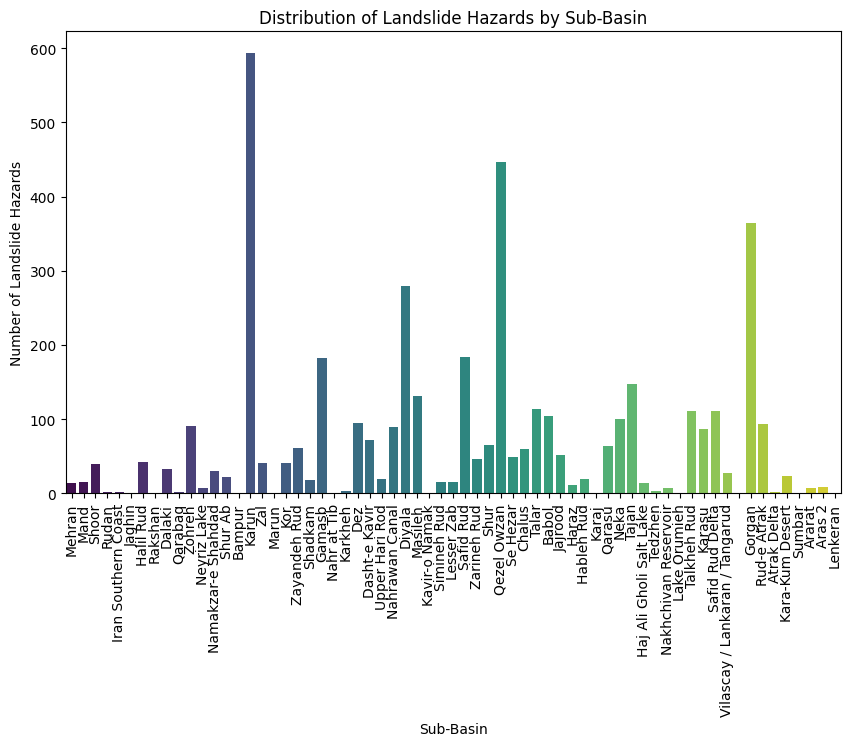

In [21]:
landslide_per_basin = iran['SUB_Basin'].value_counts()
print("Distribution of Landslides by Sub-Basin:")
print(landslide_per_basin)

#Bar plot to show basins affected by the harzards.
plt.figure(figsize=(10, 6))
sns.countplot(x='SUB_Basin', data=iran, palette='viridis')
plt.xlabel('Sub-Basin')
plt.ylabel('Number of Landslide Hazards')
plt.title('Distribution of Landslide Hazards by Sub-Basin')
plt.xticks(rotation=90)
plt.show()


From the data above, it is indicated that the areas of Karun,Qezel Owzan, Diyala and Gorgan have potentially higher risk of landslide occurences in Iran. While areas like Sumbar, Lenkeran, Karaj, Kavir-o Namak .e.t.c have little to no occurence.

### Checking for the Impact of Land Use on Landslide Occurrence

Distribution of Landslides by Land Use Type:
Landuse_Type
modrange                602
denseforest             572
mix(dryfarming_x)       434
poorrange               395
mix(modrange_x)         305
modforest               245
mix(agri_bagh)          220
agri                    204
mix(poorrange_x)        148
mix(agri_dryfarming)    144
mix(lowforest_x)        141
lowforest               130
bagh/grazing area       108
goodrange               103
dryfarming               70
mix(goodrang_x)          70
mix(bagh_X)              68
mix(modforest_x)         60
mix(woodland_x)          53
mix(agri_X)              44
mix(agri_follow)         44
urban                    22
rock                     20
masil                    19
verylowforest            17
woodland1                12
mix(denseforest_x)        9
bareland                  8
mix(verylowforest_x)      6
follow                    6
woodland2                 4
                          4
saltland                  3
mix(follow_x)     

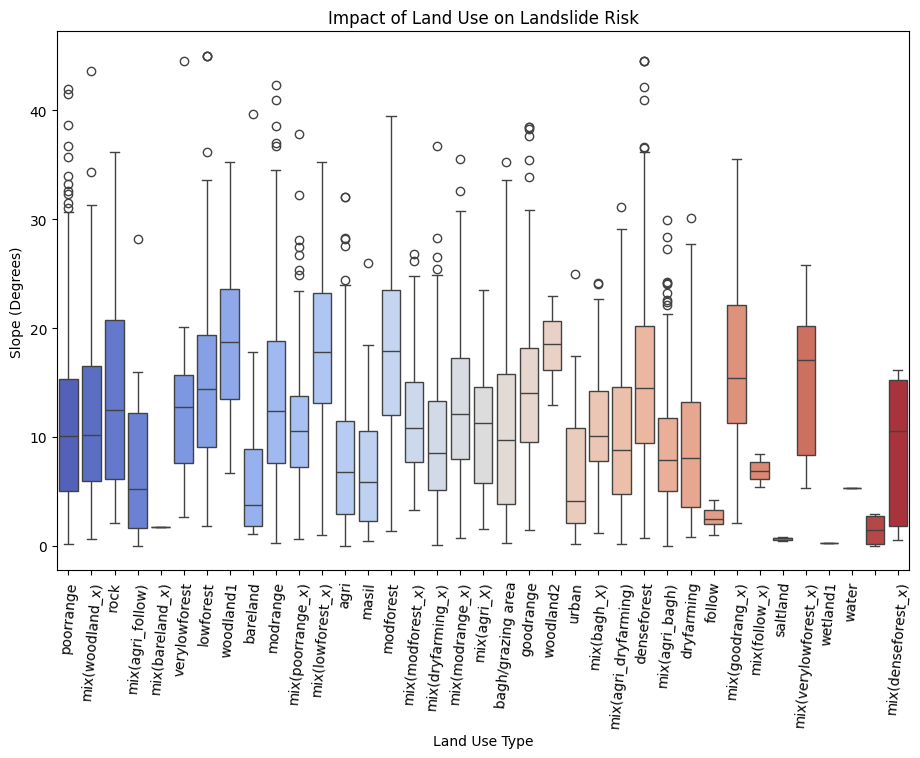

In [28]:
# Land Use Distribution with Landslides
landuse_distribution = iran['Landuse_Type'].value_counts()

print("Distribution of Landslides by Land Use Type:")
print(landuse_distribution)

#Box Plot for Landuse Vs Slope(Degrees)
plt.figure(figsize=(11, 7))
sns.boxplot(x='Landuse_Type', y='Slop(Degrees)', data=iran, palette='coolwarm')
plt.xlabel('Land Use Type')
plt.ylabel('Slope (Degrees)')
plt.title('Impact of Land Use on Landslide Risk')
plt.xticks(rotation=85)
plt.show()

Steep slopes are linked to higher landslide risk. Agricultural areas (red boxes) have the steepest slopes and most outliers, making them the most risky. Natural vegetation (blue boxes) has the gentlest slopes and is least prone to landslides.

#### Correlation Between Elevation and Landslide Occurrence

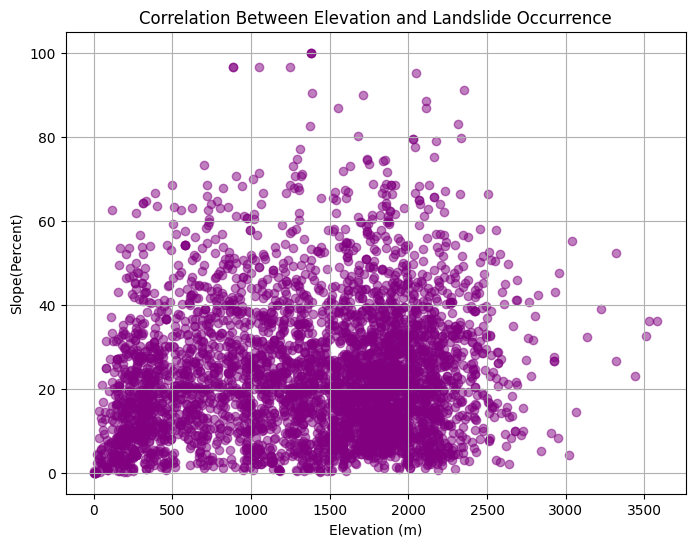

In [40]:
# Scatter plot of elevation vs. landslide occurrence
plt.figure(figsize=(8, 6))
plt.scatter(iran['Elevation'], iran['Slop(Percent)'], alpha=0.5, color='purple')
plt.xlabel('Elevation (m)')
plt.ylabel('Slope(Percent)')
plt.title('Correlation Between Elevation and Landslide Occurrence')
plt.grid(True)
plt.show()


Landslides are most frequent in mid-elevations (1500-2500 meters) and on moderate slopes, neither too steep nor flat. This suggests both elevation and slope play a role in landslide risk.

Checking for correlation with our continous variables.

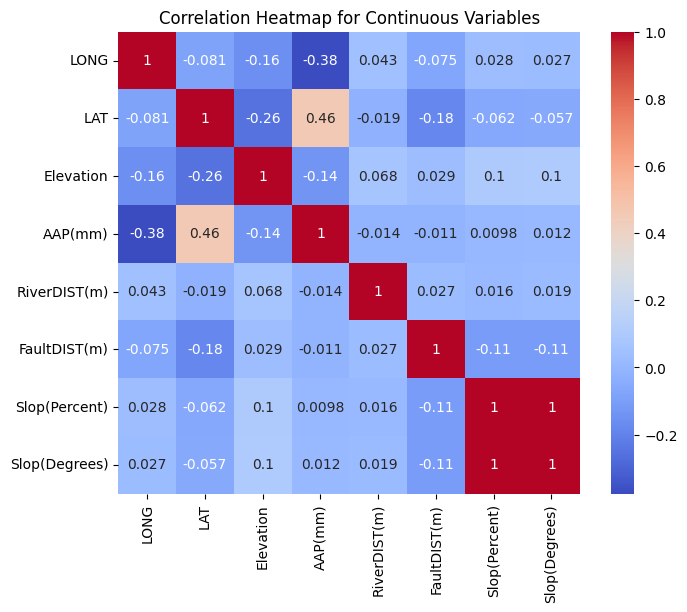

In [45]:
#Correlation matrix
corr_matrix = cont_iran.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap for Continuous Variables')
plt.show()


The heatmap shows several key factors influencing landslide risk in Iran:

> - Elevation and (AAP) Precipitation: There is a positive correlation for elevation and AAP with landslide risk meaning higher elevations and areas with more annual rainfall (AAP) see a greater frequency of landslides.

> - Rivers and Faults: Landslides are more likely near rivers, likely due to erosion, while areas further from faults experience fewer landslides as it indicated by the negative correlation.

> - Slope Angle: Steeper slopes have a positive correlation with landslide risk thus are the most susceptible to landslides.